In [ ]:
import time
import cv2

import numpy as np

import matplotlib.pyplot as plt

img=cv2.imread(r"C:input\binary_task1.bmp",0) 

#印出圖片
plt.title("HW4-binary_task1.bmp")
plt.imshow(img,cmap='gray')
plt.show()

"\n#ef\nkernel = np.ones((5,5), np.uint8)\neroded_img = cv2.erode(binary, kernel, iterations=1)\nkernel = np.ones((5,5), np.uint8)\ndilated_img = cv2.dilate(eroded_img, kernel, iterations=1)\nplt.subplot(1,3,3)\nplt.imshow(dilated_img,cmap='gray')\nplt.show()\n"

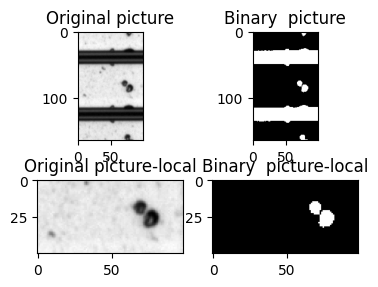

In [78]:

#圖(二)二值化
y1, y2 = 60, 110
x1, x2 = 1, 100   
roi = img[y1:y2, x1:x2]
plt.subplot(1,3,1)
plt.title("Original picture-local")
plt.imshow(roi,cmap='gray')
_, binary= cv2.threshold(roi, 115, 255,cv2.THRESH_BINARY_INV )
plt.subplot(1,3,2)
plt.title("Binary  picture-local")
plt.imshow(binary,cmap='gray')

#圖(一)二值化
y1, y2 = 0, 165
x1, x2 = 1, 100   
roi = img[y1:y2, x1:x2]
plt.subplot(3,3,1)
plt.title("Original picture")
plt.imshow(roi,cmap='gray')
_, binary = cv2.threshold(roi, 115, 255, cv2.THRESH_BINARY_INV )
plt.subplot(3,3,2)
plt.title("Binary  picture")
plt.imshow(binary,cmap='gray')






'''
#ef
kernel = np.ones((5,5), np.uint8)
eroded_img = cv2.erode(binary, kernel, iterations=1)
kernel = np.ones((5,5), np.uint8)
dilated_img = cv2.dilate(eroded_img, kernel, iterations=1)
plt.subplot(1,3,3)
plt.imshow(dilated_img,cmap='gray')
plt.show()
'''


 Area of All Pad: 204.5
 Number of Pads is: 4


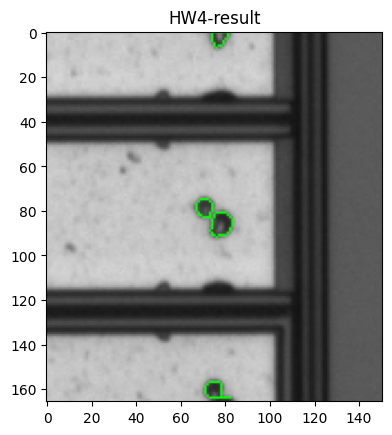

In [76]:
At_NUM=0
pad_num=1
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#篩pad設面積大小
pads = [cnt for cnt in contours if 20 < cv2.contourArea(cnt) < 800]
result = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)
At_NUM=0
pad_num=1
for cnt in pads:
    pad_num=pad_num+1
    A=cv2.contourArea(cnt)
    At_NUM+=A
    cv2.drawContours(result, [cnt], -1, (0,255,0), 1) #在result上畫結果
if At_NUM!=0:
    print(" Area of All Pad:", At_NUM)
    print(" Number of Pads is:", pad_num)

    final = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    final[y1:y2, x1:x2] = result

    plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
    plt.title("HW4-result")
    plt.show()
else:
    #沒找到任何Pad
    print("No pad in the picture")



